In [2]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt

## 1. 最简单的图形展示步骤

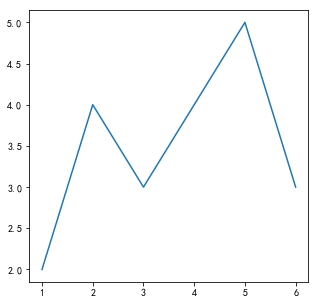

In [3]:
# 1. 创建图
plt.figure(figsize=(5, 5))

# 2. 绘制
plt.plot([1,2,3,4,5,6],[2, 4, 3,4,5,3])

# 3.展示
plt.show()

# 2. plot(折线图)

- 呈现公司产品(不同区域)每天活跃用户数
- 呈现app每天下载数量
- 呈现产品新功能上线后,用户点击次数随时间的变化
- 各种数学函数图像 

## 2.1 画一个60分钟内, 温度为15-18度的折线图

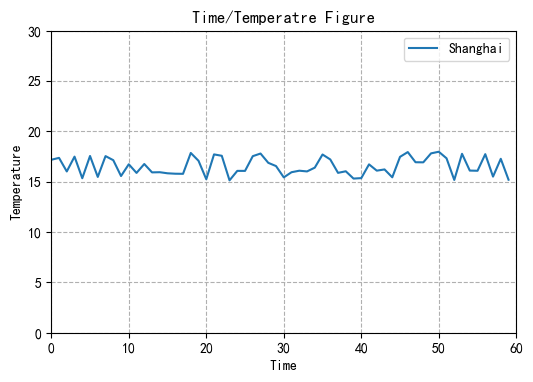

In [4]:
# 编造60组数据
x = [i for i in range(60)]
y = [np.random.uniform(15, 18) for i in range(60)]

plt.figure(dpi=100)
plt.plot(x, y, label='Shanghai')

plt.axis([0, 60, 0, 30])  # 设置横纵坐标的范围
plt.grid(linestyle='--')  # 打开网格,
plt.title('Time/Temperatre Figure')  # 设置标题
plt.xlabel('Time')  # 设置横坐标标签
plt.ylabel('Temperature')  # 设置纵坐标标签
plt.legend(loc='best')  # 设置图例, 需要为每一条线设置参数"label", 位置设置为best表示尽量不遮挡图形

plt.show()

## 2.2 解决中文显示问题

In [9]:
import matplotlib
print(matplotlib.get_cachedir())  # 删除该目录下所有的文件
print(matplotlib.matplotlib_fname())  # 更改该配置文件为下面的内容

"""
font.family         : sans-serif
font.sans-serif         : SimHei
axes.unicode_minus  : False
"""

C:\Users\tonyl\.matplotlib
c:\users\tonyl\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\mpl-data\matplotlibrc


'\nfont.family         : sans-serif\nfont.sans-serif         : SimHei\naxes.unicode_minus  : False\n'

## 2.3 可以自定义坐标轴的刻度显示

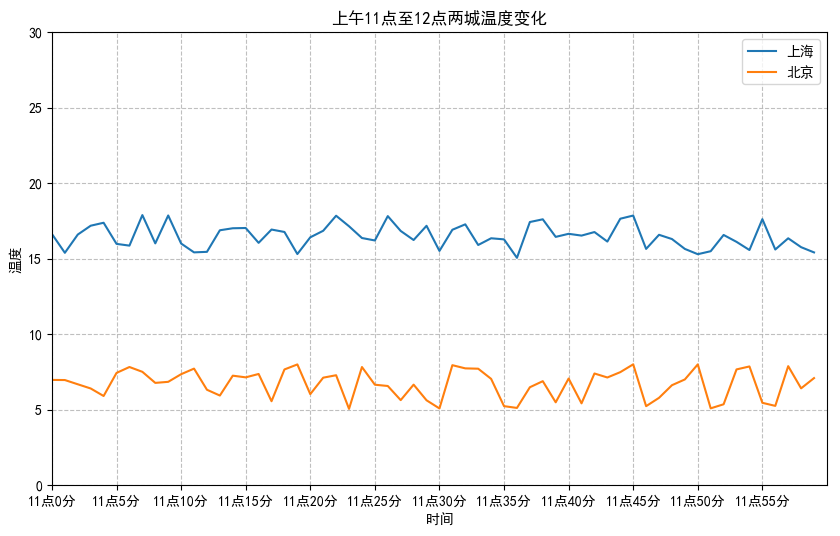

In [28]:
# 编造60组数据
x = [i for i in range(60)]
y_shanghai = [np.random.uniform(15, 18) for i in range(60)]
y_beijing = [np.random.uniform(5,8) for i in range(60)]

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(x, y_shanghai, label='上海')
plt.plot(x, y_beijing, label='北京')

plt.axis([0, 60, 0, 25])  # 设置横纵坐标的范围

plt.grid(linestyle='--', alpha=0.8)  # 打开网格,

"""自定义刻度"""
x_ticks = x[::5]  # x轴刻度的间隔为5
x_ticks_labels = ["11点%s分" % i for i in x][::5]  # x轴的刻度的显示
plt.xticks(x_ticks, x_ticks_labels)  # 显示x轴的刻度

plt.yticks(range(35)[::5])

plt.title('上午11点至12点两城温度变化')  # 设置标题
plt.xlabel('时间')  # 设置横坐标标签
plt.ylabel('温度')  # 设置纵坐标标签
plt.legend(loc='best')  # 设置图例, 需要为每一条线设置参数"label", 位置设置为best表示尽量不遮挡图形

plt.show()

# 3. scatter(散点图)

- 多用于考察数据的分布状况
- 探究不同变量之间的内在关系

## 3.1 基本使用

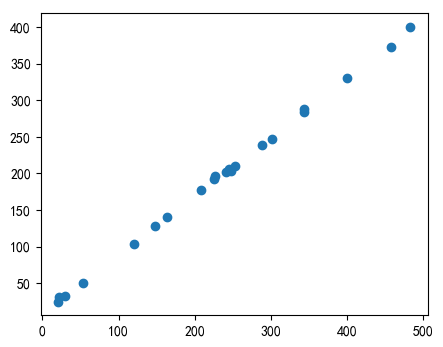

In [31]:
x = [225.98, 247.07, 253.14, 457.85, 241.58, 301.01,  20.67, 288.64,
       163.56, 120.06, 207.83, 342.75, 147.9 ,  53.06, 224.72,  29.51,
        21.61, 483.21, 245.25, 399.25, 343.35]
y = [196.63, 203.88, 210.75, 372.74, 202.41, 247.61,  24.9 , 239.34,
       140.32, 104.15, 176.84, 288.23, 128.79,  49.64, 191.74,  33.1 ,
        30.74, 400.02, 205.35, 330.64, 283.45]

plt.figure(figsize=(5, 4), dpi=100)

plt.scatter(x, y)
plt.show()

# 4. bar(柱状图)

- 数量统计
- 用户数量对比分析

**matplotlib.pyplot.bar(x, width, align='center', \*\*kwargs)**

## 4.1 不同电影的票房展示

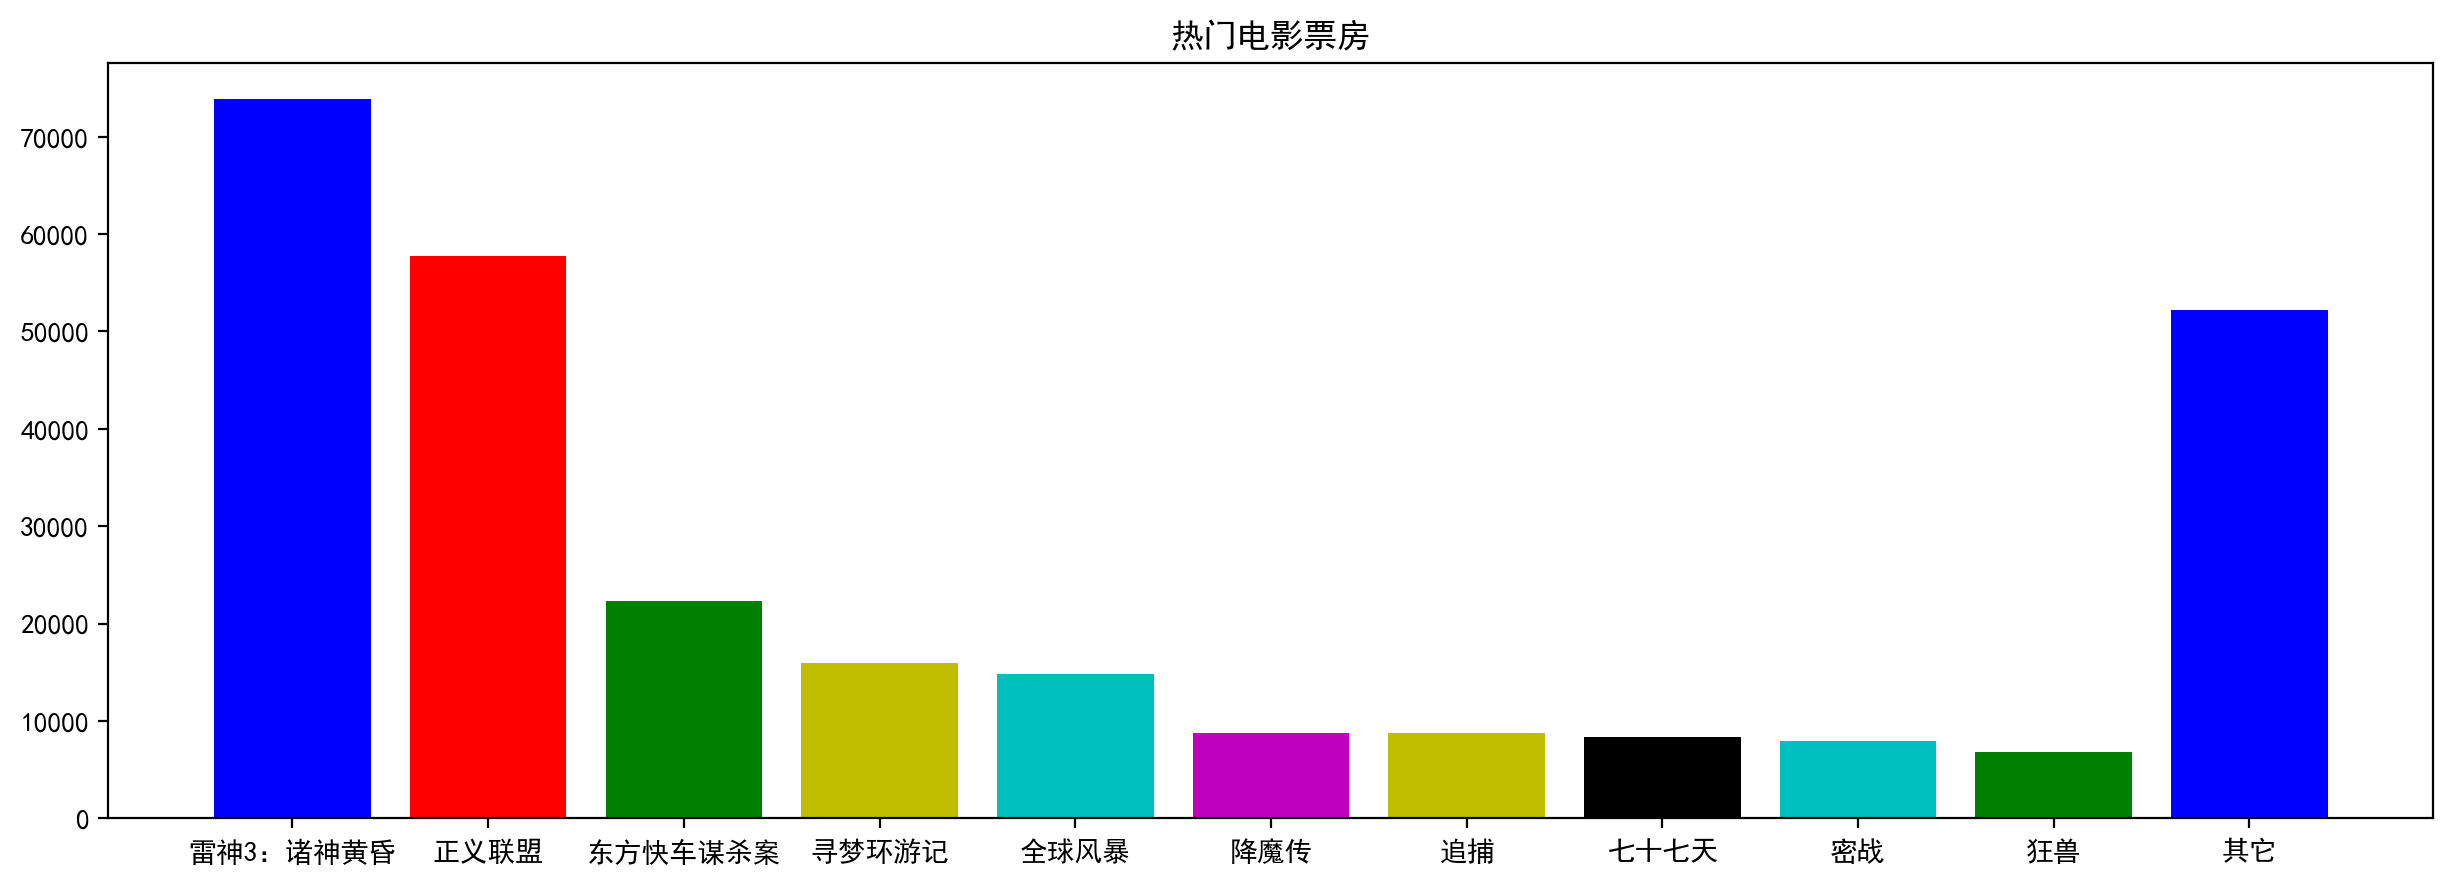

In [53]:
"""不能直接以中文名作为x轴坐标,需要转换"""

movie_names = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴', '降魔传','追捕','七十七天','密战','狂兽','其它']
x = range(len(movie_names))

y = [73853,57767,22354,15969,14839,8725,8716,8318,7916,6764,52222]

plt.figure(figsize=(15,5),dpi=200)

plt.bar(x, y, width=0.8, color=['b','r','g','y','c','m','y','k','c','g','b'])  # 设置多种颜色,以及柱子的宽度

plt.title('热门电影票房')
# plt.grid(linestyle='--')
plt.xticks(x, movie_names)  # 通过设置刻度来显示电影名
plt.show()

## 4.2 电影不同时期的票房展示

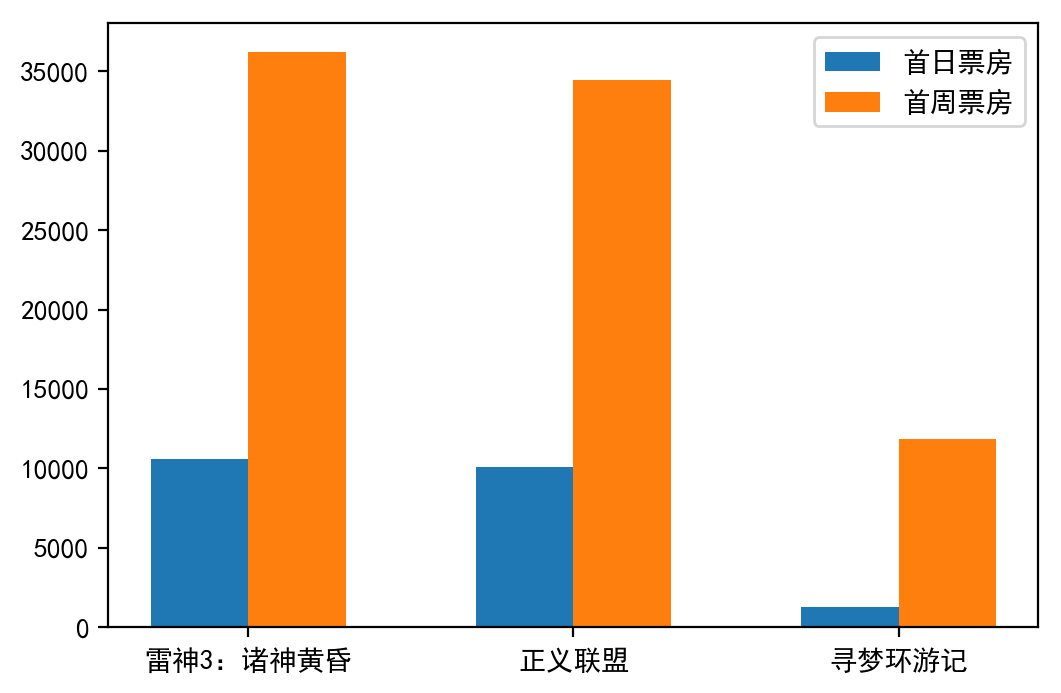

In [71]:
movie_names = ['雷神3：诸神黄昏','正义联盟','寻梦环游记']
x = range(len(movie_names))

first_day = [10587.6,10062.5,1275.7]  # 首日票房
first_week=[36224.9,34479.6,11830]  # 首周票房

plt.figure(figsize=(6, 4), dpi=200)

width = 0.3  # 柱子的宽度

plt.bar(x, first_day, width=width,label='首日票房')
# plt.bar(x, first_week)  # 直接显示会将之前的数据覆盖

"""将第二个展示的图形进行偏移从而使不会覆盖前面的数据"""
x2 = [i + width for i in x]
plt.bar(x2, first_week, width=width,label='首周票房')

# 更改x坐标轴刻度
x_ticks = [i + width/2 for i in x]
plt.xticks(x_ticks, movie_names)

plt.legend(loc='best')

plt.show()

# 5. hist(直方图)

- 用于表示分布情况
- 通过直方图还可以观察和估计哪些数据比较集中，异常或者孤立的数据分布在何处
- 相较于柱形图, 利于展示大量数据集的统计结果

**matplotlib.pyplot.hist(x, bins=None, normed=None, \*\*kwargs)**

Parameters:    
x : (n,) array or sequence of (n,) arrays

bins : 组数, integer or sequence or ‘auto’, optional, **通常计算公式: (max-min)/组距,组数尽量不超过12**

## 5.1 电影时长区间展示

(array([ 1.,  1.,  3.,  1.,  2.,  0.,  0.,  1.,  3.,  2.,  4.,  7.,  6.,
        8., 11.,  8., 18., 12., 13., 17., 12.,  9., 13.,  9., 11.,  8.,
       10., 10.,  7., 13., 10.,  4.,  2.,  6.,  3.,  1.,  2.,  0.,  2.]), array([ 78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98.,
       100., 102., 104., 106., 108., 110., 112., 114., 116., 118., 120.,
       122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156.]), <a list of 39 Patch objects>)


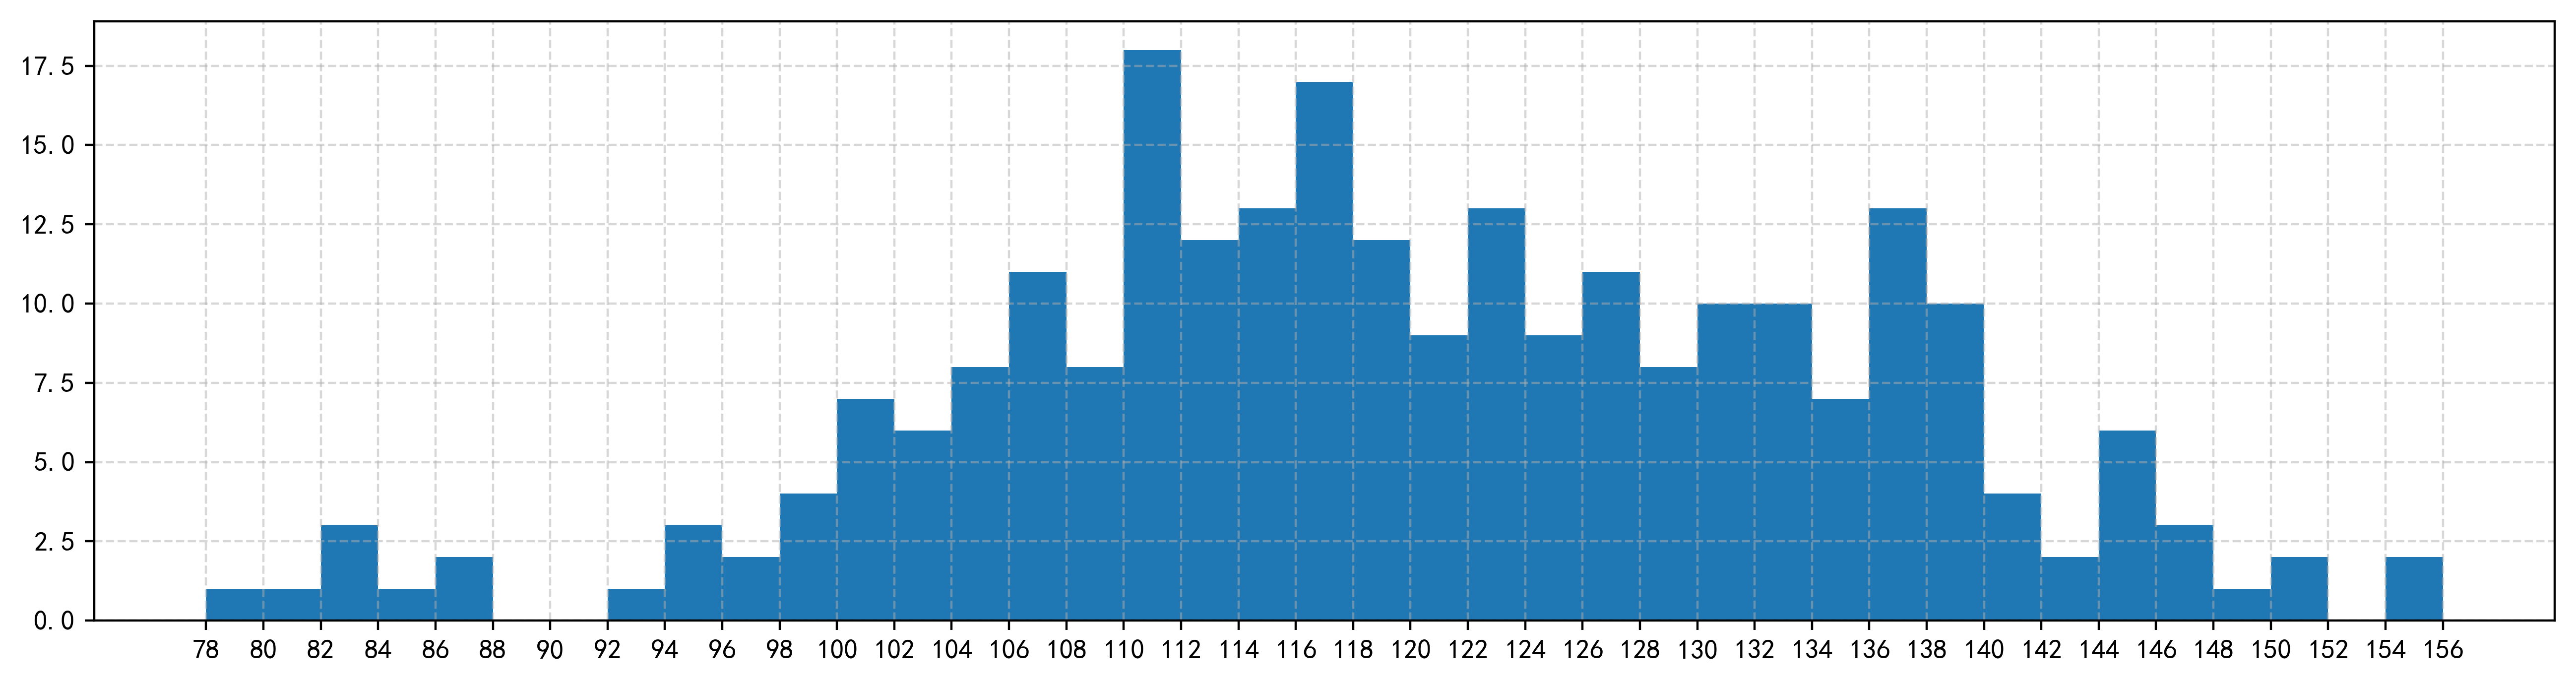

In [82]:
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

width = 2  # 设置组距
bins = int((max(time)-min(time))/width)  # 计算组数

plt.figure(figsize=(16, 4), dpi=400)

# 画图注意其有返回值
# result[0]为在各个区间的数量
# result[1]为计算得到的各个区间值
result = plt.hist(time, bins=bins)
print(result)

plt.xticks(result[1])  # 将返回的值作为x坐标轴的刻度
plt.grid(linestyle='--', alpha=0.5)

plt.show()

# 6. pie(饼图)

- 分类的占比情况（不超过9个分类）

**plt.pie(x, labels=,autopct=,colors)**

x:数量，自动算百分比

labels:每部分名称

autopct:占比显示指定%1.2f%%

colors:每部分颜色

## 6.1 显示不同的电影类型占比

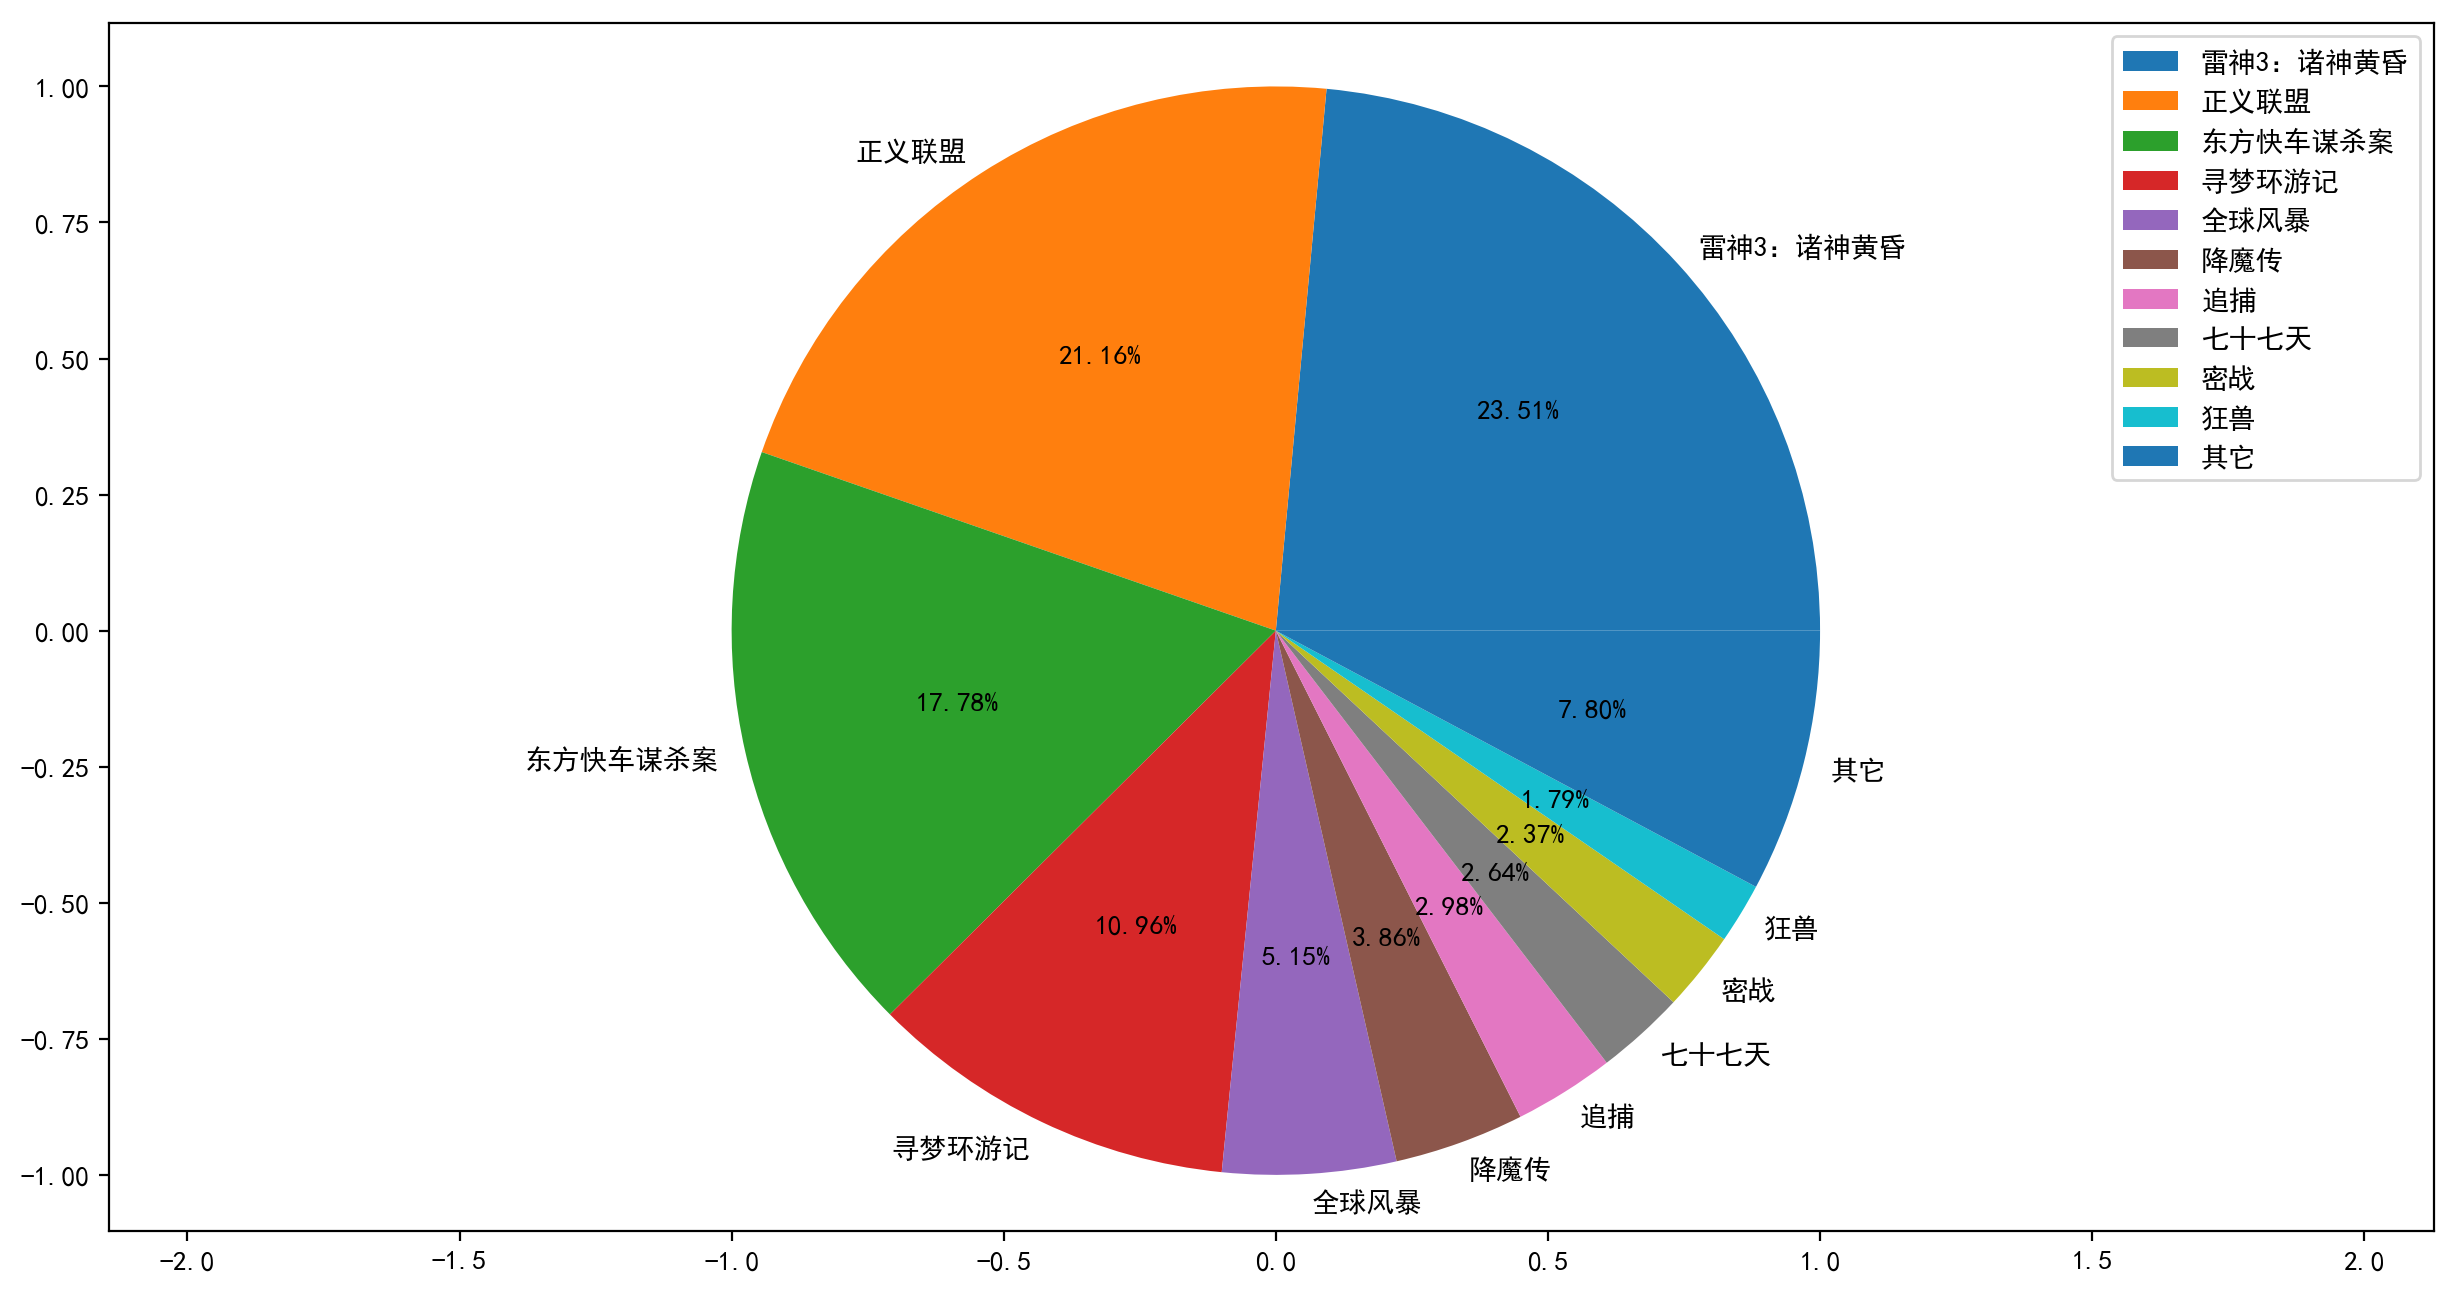

In [102]:
movie_names = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴','降魔传','追捕','七十七天','密战','狂兽','其它']
place_count = [60605,54546,45819,28243,13270,9945,7679,6799,6101,4621,20105]  # 排片情况

plt.figure(figsize=(15, 8), dpi=200)

plt.pie(place_count, labels=movie_names, autopct="%.2f%%", frame=True, labeldistance=1.05)

# 调整比例
plt.axis('equal')
plt.legend(loc='best')

plt.show()